# Housing Project (Post-Disaster Investment Project)

  Idea for the end result of the project. Make an accurate prediction of the value of a house/land after a disaster and if it would actually recover.

  What this program below does is just predict the value of a house based on the data below. My hope is to alude that it is possible to predict a house's value and in the future can predict home/land recovery.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy import Nominatim
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import multivariate_normal as mvn
import os
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import random
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

## Import Data Sets and Select Features

X holds the features that I determined to give the highest accuracy. Just add features by name into the List to add that data into the algorithm.

In [4]:
data_full = pd.read_csv('/content/drive/My Drive/DataSets/House Data/Full.csv')
X = data_full[ [ 'SQFT', 'GISACRES', 'GARAGECAPA', 'CLASS', 'BATHFIXTUR', 'YEAR', 'ACTUAL'] ] #, 'PrPerSqFt', 'COOL','HEAT', 'BATHFIXTUR',
X = X.to_numpy()
y = data_full[ ['SalePrice'] ]
y = y.to_numpy().astype(float)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning

In [0]:
#### Delete Outliers in SalesPrice over $2.5 million
X_del = []
for i in range(len(y)):
  if y[i] >= 2500000 or y[i] < 10000:
    X_del.append(i)
X = np.delete(X, X_del, 0)
y = np.delete(y, X_del, 0)



## Data Visualization

### Scatter Plots

<Figure size 432x288 with 0 Axes>

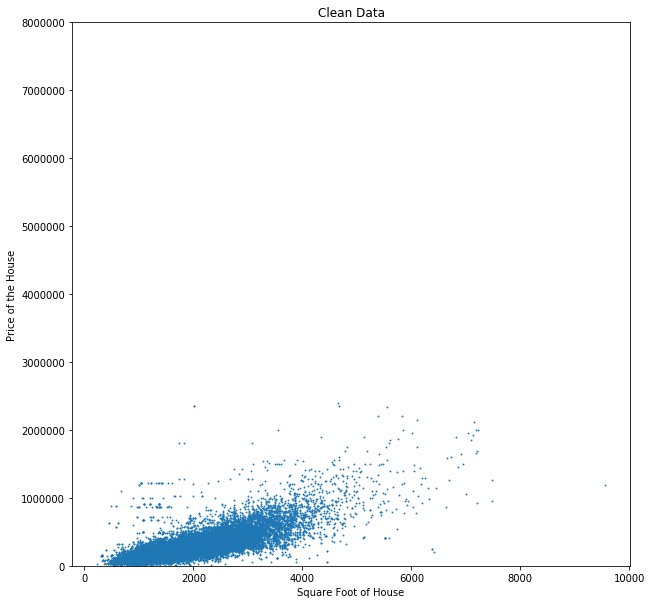

In [7]:
### Data Cleaning Plots 
plt.figure()
plt.figure(figsize = (10,10))
plt.title('Clean Data')
plt.xlabel('Square Foot of House')
plt.ylabel('Price of the House')
plt.ylim(0,8000000)
plt.scatter(X[:,0], y, s = 0.75)

### Histograms

<Figure size 1440x1440 with 0 Axes>

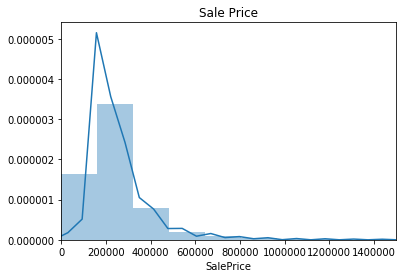

<Figure size 1440x1440 with 0 Axes>

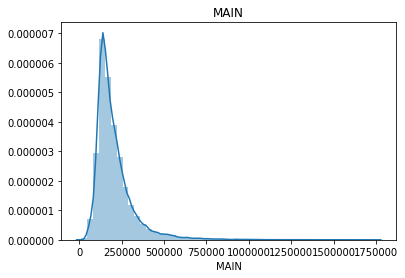

<Figure size 1440x1440 with 0 Axes>

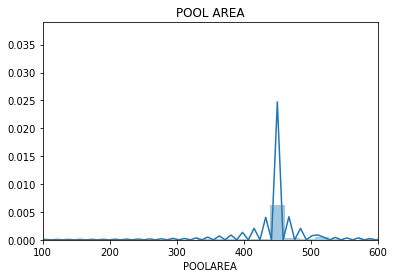

<Figure size 1440x1440 with 0 Axes>

In [8]:
#### Histogram 
plt.figure()
plt.title('Sale Price')
sns.distplot(data_full['SalePrice'])
plt.xlim(0, 1500000)
plt.figure(figsize=(20,20))

plt.figure()
plt.title('MAIN')
sns.distplot(data_full['MAIN'])
plt.figure(figsize=(20,20))

plt.figure()
plt.title('POOL AREA')
sns.distplot(data_full['POOLAREA'])
plt.xlim(100, 600)
plt.figure(figsize=(20,20))

## Normalizing Data

In [0]:
X[:, -1] = np.log(X[:, -1])
y = np.log(y)

## Build Training and Test Sets

In [0]:
seed = 69
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state= random.seed(seed))


## Models

In [0]:
class MultipleLinearRegression():
  def fit(self, X, y):
    self.w = np.linalg.solve(X.T@X,X.T@y)

  def predict(self, X):
    return np.matmul(X, self.w)

In [0]:
mlr = MultipleLinearRegression()
mlr.fit(X_train,y_train)
y_hat = mlr.predict(X_test) 

## Results

In [16]:
total = 0 
in_range = 0
for i in range(len(y_hat)):
  if y_hat[i]/y_test[i] >= 0.95 and y_hat[i]/y_test[i] <= 1.05:
    in_range += 1
  total += 1
accur = in_range/total
print( in_range/total )


0.968234284078985


## Correlation Matrix

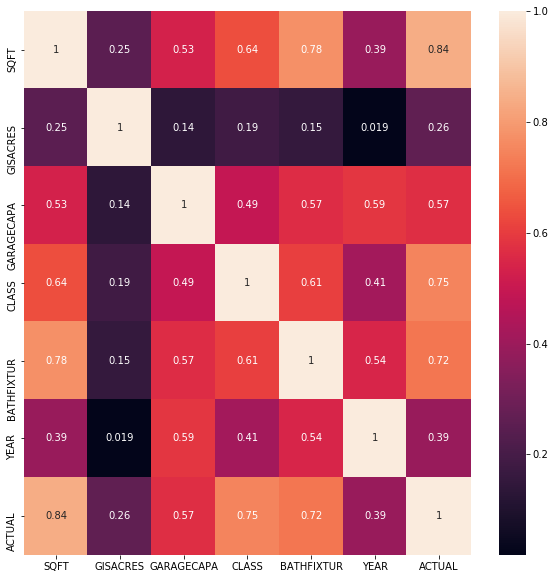

In [15]:
X_train = pd.DataFrame(X_train)
X_train_corr = X_train.corr()
plt.figure(figsize = (10,10))
x_axis_labels = [ 'SQFT', 'GISACRES', 'GARAGECAPA', 'CLASS', 'BATHFIXTUR', 'YEAR', 'ACTUAL'] # labels for x-axis
y_axis_labels = [ 'SQFT', 'GISACRES', 'GARAGECAPA', 'CLASS', 'BATHFIXTUR', 'YEAR', 'ACTUAL'] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(X_train_corr, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
